# Exploring the German-Korean Tatoeba dataset
[Github](https://github.com/Helsinki-NLP/Tatoeba-Challenge)

[Huggingface](https://huggingface.co/datasets/Helsinki-NLP/tatoeba_mt)

In [1]:
from tatoeba import preprocess, analysis
from rude_nmt import label_german, label_korean
import re
import pandas as pd

In [2]:
subtitle_data = preprocess.get_subtitle_dataset(force_renew=False)

In [3]:
len(subtitle_data)
print(subtitle_data)


Dataset({
    features: ['id', 'source', 'target'],
    num_rows: 996525
})


In [4]:
subtitle_data = subtitle_data.map(label_german.annotate_formality, load_from_cache_file=True, num_proc=8)
subtitle_data = subtitle_data.map(label_korean.annotate_formality, load_from_cache_file=True, num_proc=8)

Loading cached processed dataset at /Users/lsickert/Repositories/rude-nmt/data/subtitles/cache-6b2a426d42ab72dd_*_of_00008.arrow
Loading cached processed dataset at /Users/lsickert/Repositories/rude-nmt/data/subtitles/cache-65b99666fbe3f6d3_*_of_00008.arrow


In [5]:
doc = label_german.get_pos_tags(subtitle_data[1:3])

In [6]:
print(doc)

{'id': ['OpenSubtitles-v2018\tdeu\tkor_Hang', 'OpenSubtitles-v2018\tdeu\tkor_Hang'], 'source': ['Carol, hier ist Vincent. Sag nichts. Hör bloß zu.', 'Yay! Yay!'], 'target': ['캐럴, 나야 빈센트 말하지 말고 들어', '만번째세요!'], 'de_formality': ['underspecified', 'underspecified'], 'ko_formality': ['haeche', 'hayoche'], 'upos_tags': [['PROPN', 'PUNCT', 'ADV', 'AUX', 'PROPN', 'PUNCT', 'VERB', 'PRON', 'PUNCT', 'VERB', 'ADV', 'ADP', 'PUNCT'], ['PROPN', 'PUNCT', 'PROPN', 'PUNCT']], 'pos_tags': [['NE', '$,', 'ADV', 'VAFIN', 'NE', '$.', 'VVIMP', 'PIS', '$.', 'VVIMP', 'ADV', 'PTKVZ', '$.'], ['NE', '$.', 'NE', '$.']], 'ws_tokens': [['Carol', ',', 'hier', 'ist', 'Vincent', '.', 'Sag', 'nichts', '.', 'Hör', 'bloß', 'zu', '.'], ['Yay', '!', 'Yay', '!']]}


In [7]:
subtitle_data = subtitle_data.map(label_german.get_pos_tags, load_from_cache_file=False, batched=True)

Map:   0%|          | 0/996525 [00:00<?, ? examples/s]

[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/lsickert/Repositories/rude-nmt/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/0q/82q5sw8x1mx2jz987fz_sdq40000gn/T/ipykernel_41411/2647380039.py", line 1, in <module>
    subtitle_data = subtitle_data.map(label_german.get_pos_tags, load_from_cache_file=False, batched=True)
  File "/Users/lsickert/Repositories/rude-nmt/.venv/lib/python3.10/site-packages/datasets/arrow_dataset.py", line 563, in wrapper
    out: Union["Dataset", "DatasetDict"] = func(self, *args, **kwargs)
  File "/Users/lsickert/Repositories/rude-nmt/.venv/lib/python3.10/site-packages/datasets/arrow_dataset.py", line 528, in wrapper
    out: Union["Dataset", "DatasetDict"] = func(self, *args, **kwargs)
  File "/Users/lsickert/Repositories/rude-nmt/.venv/lib/python3.10/site-packages/datasets/arrow_dataset.py", line 3004, in map
    for rank, done, content

In [5]:
subtitle_data.to_csv("./data/subtitle_data.csv")

Creating CSV from Arrow format:   0%|          | 0/997 [00:00<?, ?ba/s]

176923313

In [6]:
one_word_trg = analysis.get_one_word_sentences(subtitle_data)
print(one_word_trg)

Filter (num_proc=8):   0%|          | 0/996525 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'source', 'target', 'de_formality', 'ko_formality'],
    num_rows: 95448
})


In [7]:
dat = subtitle_data.to_pandas()

In [8]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996525 entries, 0 to 996524
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            996525 non-null  object
 1   source        996525 non-null  object
 2   target        996525 non-null  object
 3   de_formality  996525 non-null  object
 4   ko_formality  996525 non-null  object
dtypes: object(5)
memory usage: 38.0+ MB


In [9]:
dat["de_formality"] = dat["de_formality"].astype('category')

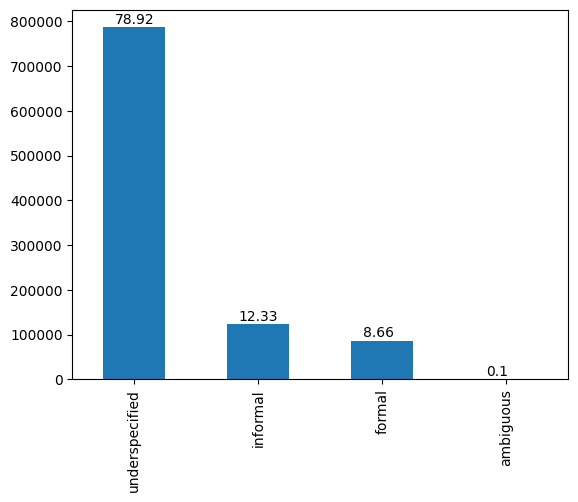

In [10]:
rows = len(dat.index)
ax = dat["de_formality"].value_counts().plot(kind="bar")
for p in ax.patches:
    b = p.get_bbox()
    ax.annotate(str(round(p.get_height()/rows * 100,2)), ((b.x0 + b.x1)/2 - 0.16, b.y1 + 8000))

fig = ax.get_figure()
fig.savefig("german.png", bbox_inches="tight")

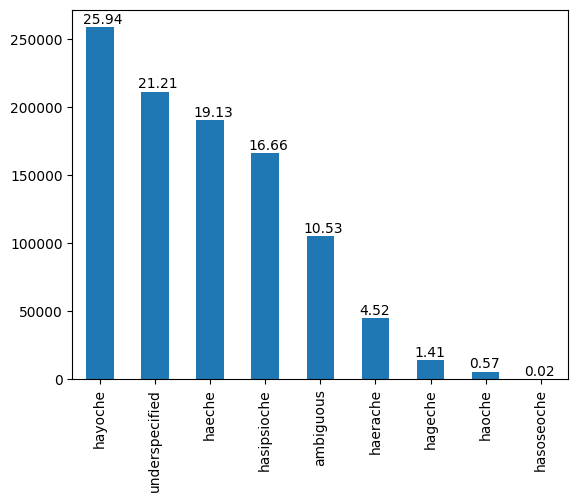

In [11]:
rows = len(dat.index)
ax = dat["ko_formality"].value_counts().plot(kind="bar")
for p in ax.patches:
    b = p.get_bbox()
    ax.annotate(str(round(p.get_height()/rows * 100,2)), ((b.x0 + b.x1)/2 - 0.3, b.y1 + 2500))

fig = ax.get_figure()
fig.savefig("korean.png", bbox_inches="tight")

In [12]:
pd.set_option('display.max_rows', 500)

In [13]:
print(len(dat.index))

996525


In [14]:
dat["de_formality"].value_counts()

underspecified    786418
informal          122893
formal             86266
ambiguous            948
Name: de_formality, dtype: int64

In [15]:
dat["ko_formality"].value_counts()

hayoche           258488
underspecified    211338
haeche            190685
hasipsioche       166069
ambiguous         104964
haerache           45066
hageche            14030
haoche              5714
hasoseoche           171
Name: ko_formality, dtype: int64

In [16]:
dat.head(10)

,id,source,target,de_formality,ko_formality
0,OpenSubtitles-v2018\tdeu\tkor_Hang,Weil ... du sie sehr geliebt hast und sie dir ...,당신이... 할머닐 너무 사랑하고 그리워했기 때문에요?,informal,hayoche
1,OpenSubtitles-v2018\tdeu\tkor_Hang,"Carol, hier ist Vincent. Sag nichts. Hör bloß zu.","캐럴, 나야 빈센트 말하지 말고 들어",underspecified,haeche
2,OpenSubtitles-v2018\tdeu\tkor_Hang,Yay! Yay!,만번째세요!,underspecified,hayoche
3,OpenSubtitles-v2018\tdeu\tkor_Hang,Sie müssen mir helfen. Ich brauche Ihre Hilfe....,나도 그러고는 싶네만..,formal,underspecified
4,OpenSubtitles-v2018\tdeu\tkor_Hang,"Wir müssen herausfinden, wo die Tests sind.",어디로 가려는 거야? 시험 결과를 보관해 놓은 곳을 찾아야 해,underspecified,haeche
5,OpenSubtitles-v2018\tdeu\tkor_Hang,"Denken Sie, wir können ihr helfen?",우리가 도울 수 있을까요?,formal,hayoche
6,OpenSubtitles-v2018\tdeu\tkor_Hang,Du bist nicht alleine. Dieser Raum ist zum Beten.,가자 아가야 넌 혼자가 아냐,informal,haerache
7,OpenSubtitles-v2018\tdeu\tkor_Hang,Was hast du gekauft? Einen Haufen Zeug.,웰빙 마트로 갔어?,informal,haeche
8,OpenSubtitles-v2018\tdeu\tkor_Hang,"Ich weiß, du hast gesagt, dass du dich nicht e...",니가 불안해하는 게 아니라고 했었지,informal,haeche
9,OpenSubtitles-v2018\tdeu\tkor_Hang,"""und führst ein anständiges Leben...",이제껏 그랬던 것처럼,underspecified,underspecified


In [17]:
amb_dat = dat[dat["ko_formality"].str.match("underspecified")]

In [18]:
amb_dat.head(100)

,id,source,target,de_formality,ko_formality
3,OpenSubtitles-v2018\tdeu\tkor_Hang,Sie müssen mir helfen. Ich brauche Ihre Hilfe....,나도 그러고는 싶네만..,formal,underspecified
9,OpenSubtitles-v2018\tdeu\tkor_Hang,"""und führst ein anständiges Leben...",이제껏 그랬던 것처럼,underspecified,underspecified
17,OpenSubtitles-v2018\tdeu\tkor,Noch nicht.,"아뇨, 아직...",underspecified,underspecified
33,OpenSubtitles-v2018\tdeu\tkor_Hang,Welch schöner Gesang.,폐하,underspecified,underspecified
35,OpenSubtitles-v2018\tdeu\tkor,Willkommen im Club.,헛소리.,underspecified,underspecified
40,OpenSubtitles-v2018\tdeu\tkor,Ich meine...,내 말은...,underspecified,underspecified
45,OpenSubtitles-v2018\tdeu\tkor_Hang,Dein Leben hast du im kalifornischen Strafvoll...,스페인어도 못 하면서 어떻게 캘리포니아에서,informal,underspecified
50,TED2020-v1\tdeu\tkor_Hang,"Bis zur Anästhesie, der Abwesenheit von Gefühl.",고통을 없애는 마취를 치과의사였던 윌리엄 모톤이,underspecified,underspecified
52,OpenSubtitles-v2018\tdeu\tkor_Hang,Na bitte! Ein Naturtalent.,바로 그거야 아주 자연스러워,underspecified,underspecified
63,OpenSubtitles-v2018\tdeu\tkor_Hang,Sieh nur.,봐,underspecified,underspecified
